# OVERVIEW 


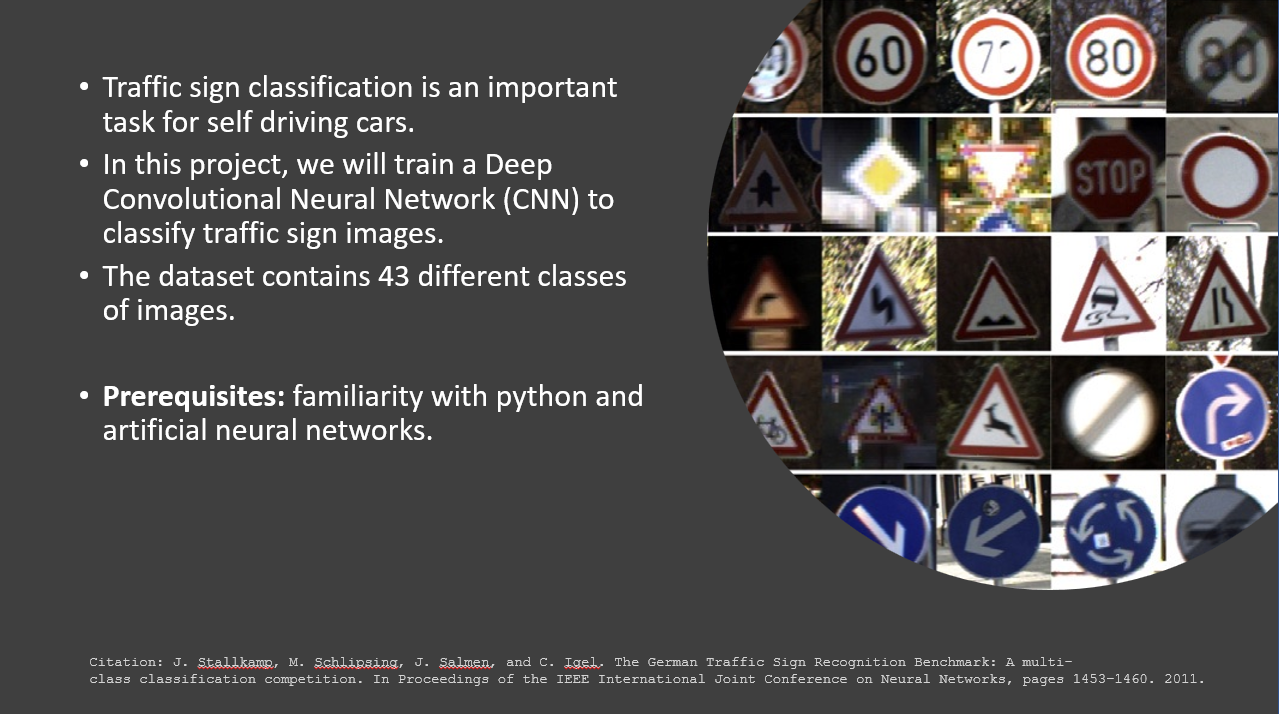

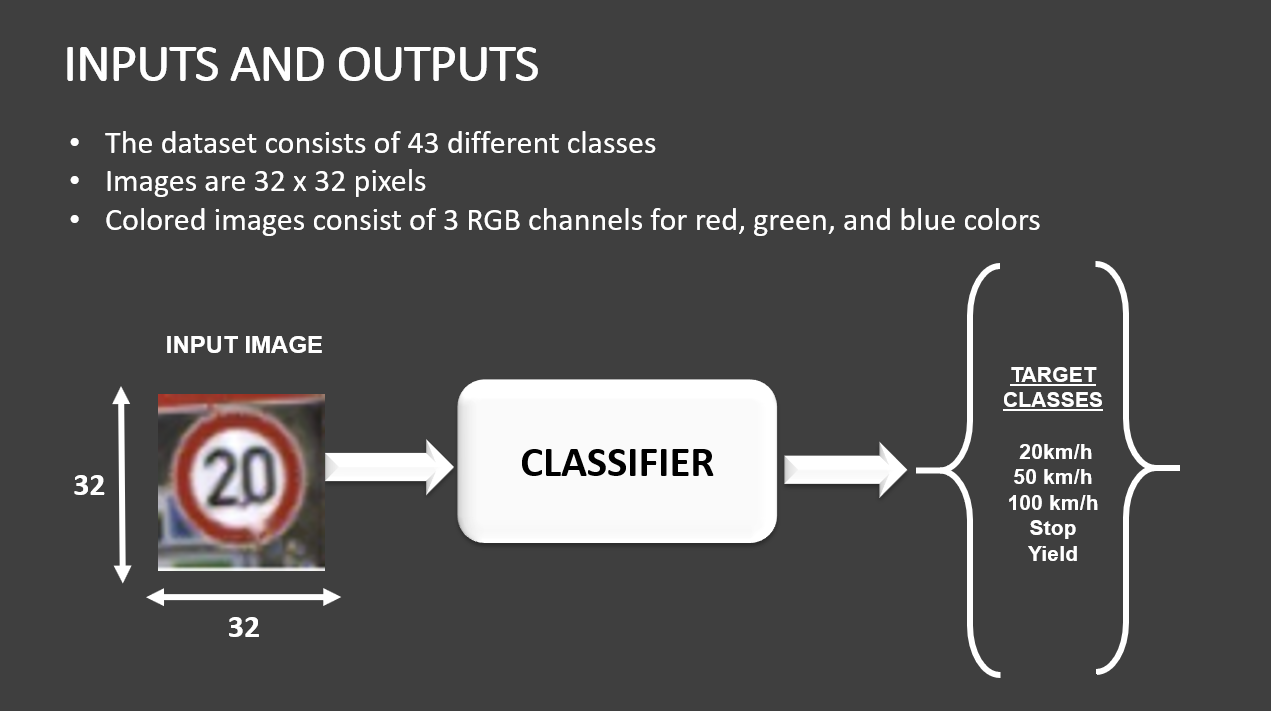

# MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

In [136]:
 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

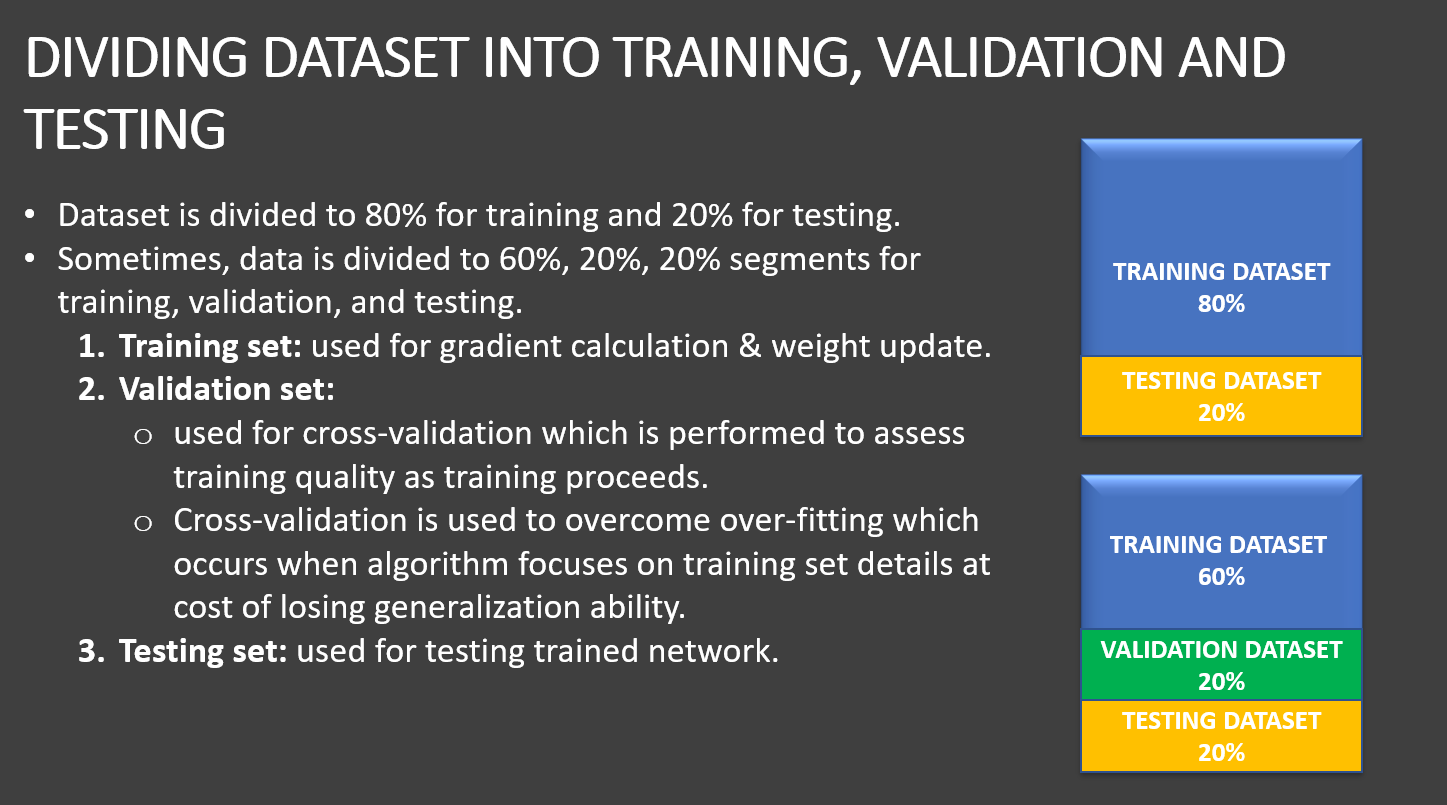

In [64]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [65]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [66]:
X_train.shape

(34799, 32, 32, 3)

In [67]:
y_train.shape

(34799,)

# PERFROM IMAGES VISUALIZATION

12

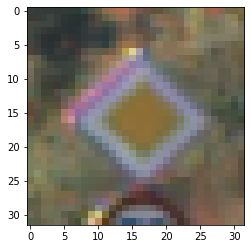

In [68]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

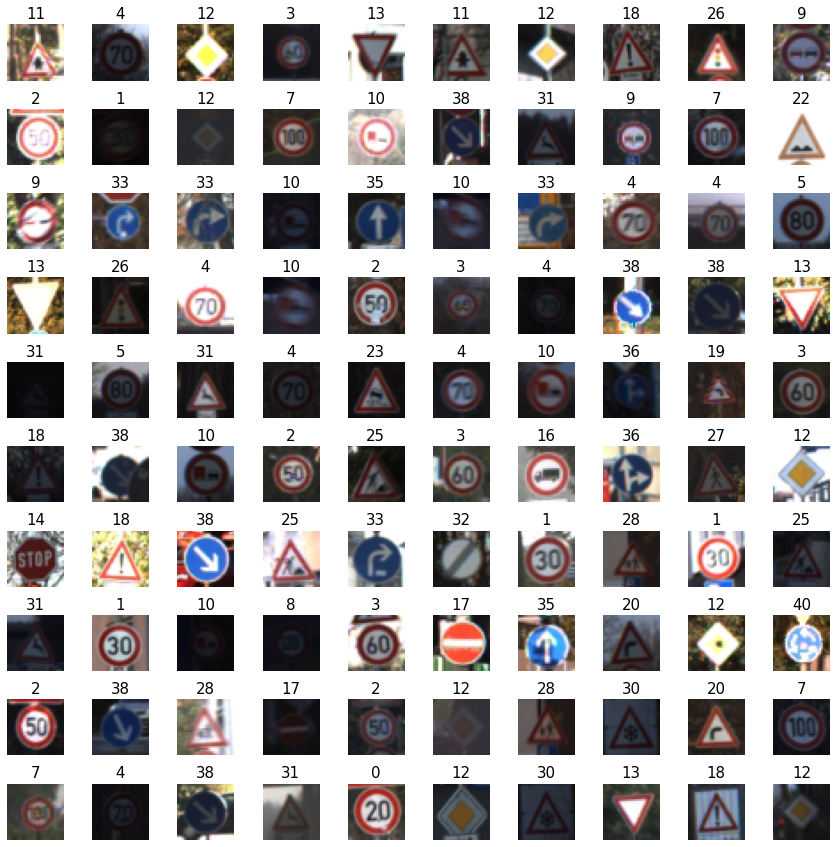

In [69]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

        

# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [70]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [71]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [72]:
X_train_gray.shape


(34799, 32, 32, 1)

In [73]:
X_test_gray.shape


(12630, 32, 32, 1)

In [74]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [75]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [76]:
X_train_gray_norm

array([[[[-0.82291667],
         [-0.77083333],
         [-0.7890625 ],
         ...,
         [-0.7890625 ],
         [-0.80729167],
         [-0.83072917]],

        [[-0.81770833],
         [-0.77864583],
         [-0.78125   ],
         ...,
         [-0.79166667],
         [-0.78645833],
         [-0.79166667]],

        [[-0.81510417],
         [-0.79166667],
         [-0.77604167],
         ...,
         [-0.78645833],
         [-0.78385417],
         [-0.77083333]],

        ...,

        [[-0.84895833],
         [-0.8671875 ],
         [-0.85416667],
         ...,
         [-0.85677083],
         [-0.81510417],
         [-0.828125  ]],

        [[-0.84635417],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.85677083],
         [-0.8125    ],
         [-0.82291667]],

        [[-0.83854167],
         [-0.86979167],
         [-0.84635417],
         ...,
         [-0.859375  ],
         [-0.83333333],
         [-0.80729167]]],


       [[[-0.2109375 ],


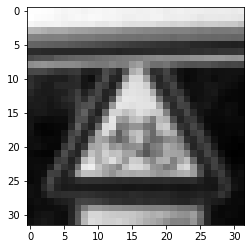

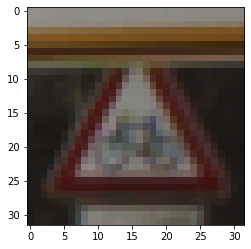

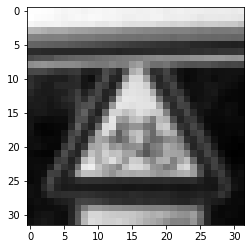

In [77]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

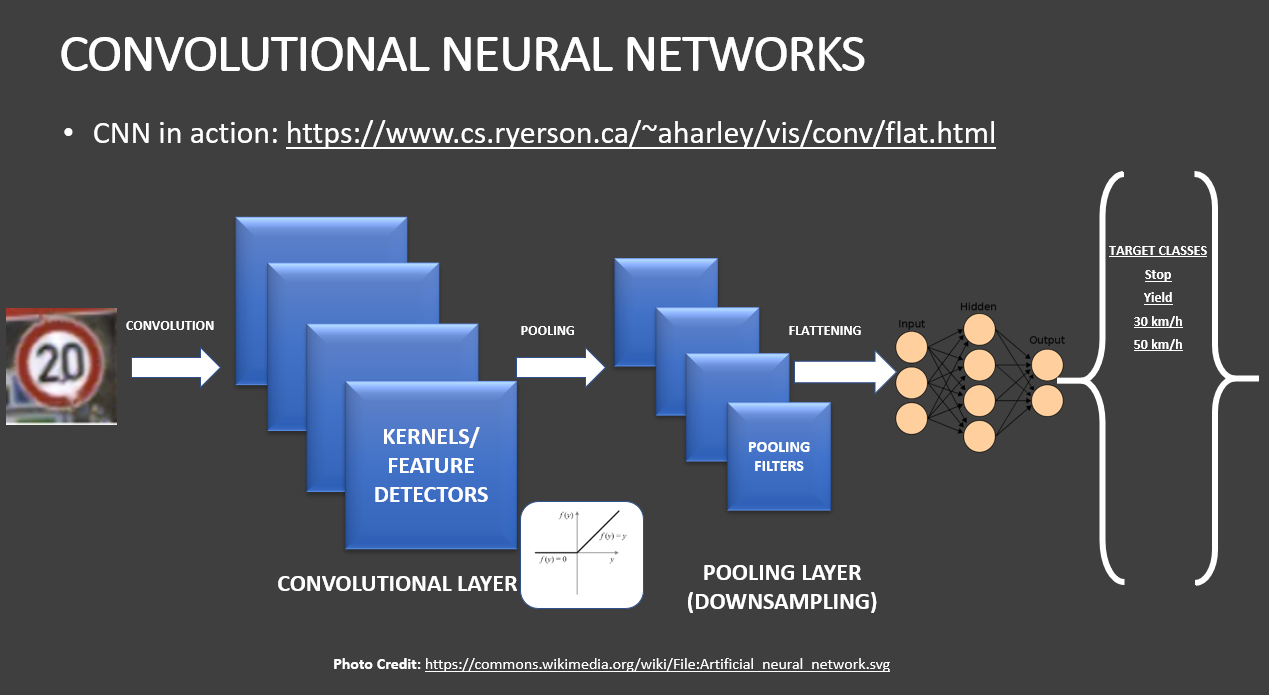

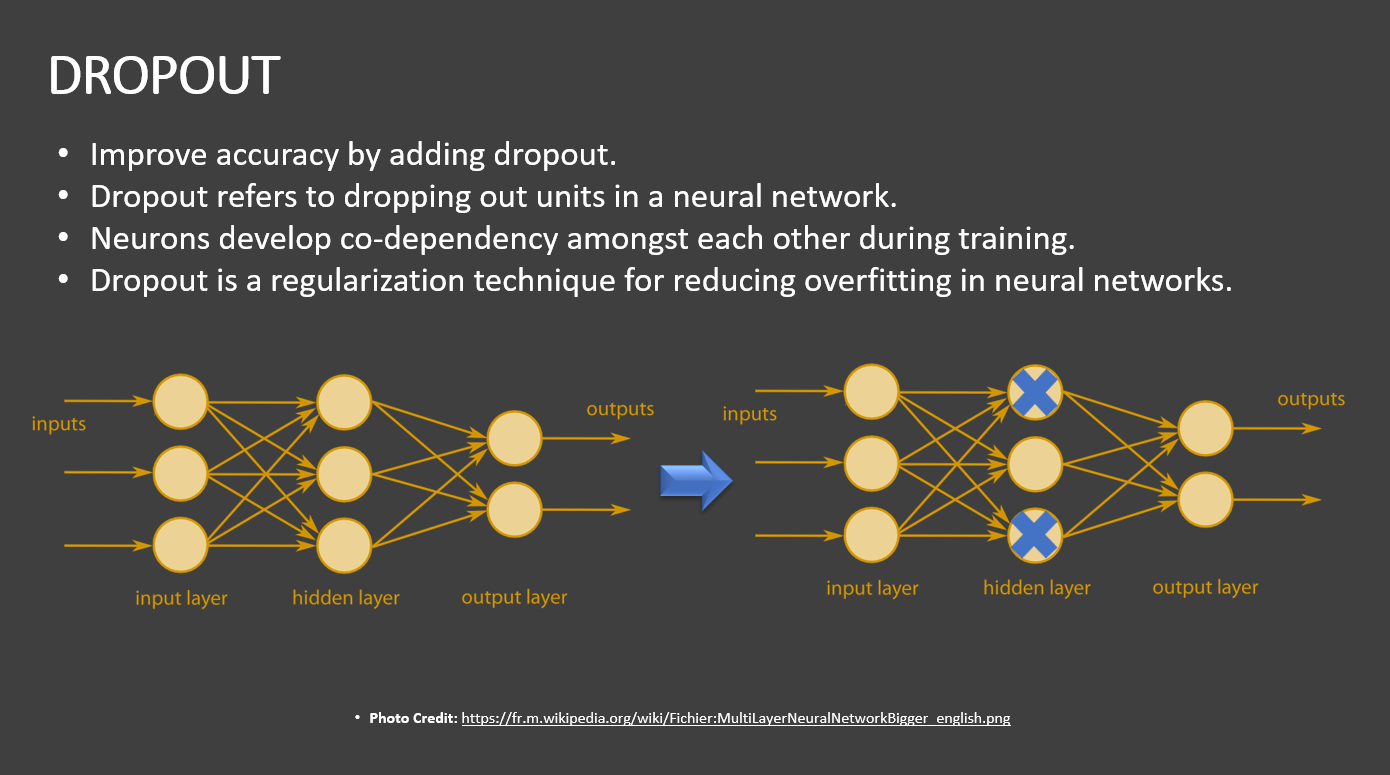

#  BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [264]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.MaxPooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.MaxPooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 120)             

# COMPILE AND TRAIN DEEP CNN MODEL

In [277]:
opt=tf.keras.optimizers.RMSprop()
#opt=tf.keras.optimizers.Adam()
CNN.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [280]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 1000,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/5
35/35 [==============================] - 5s 149ms/step - loss: 0.0299 - accuracy: 0.9898 - val_loss: 0.5592 - val_accuracy: 0.9367
Epoch 2/5
35/35 [==============================] - 5s 148ms/step - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0.5942 - val_accuracy: 0.9249
Epoch 3/5
35/35 [==============================] - 5s 150ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.4822 - val_accuracy: 0.9304
Epoch 4/5
35/35 [==============================] - 5s 150ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.5291 - val_accuracy: 0.9302
Epoch 5/5
35/35 [==============================] - 5s 150ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.5766 - val_accuracy: 0.9293


# ASSESS TRAINED CNN MODEL PERFORMANCE 

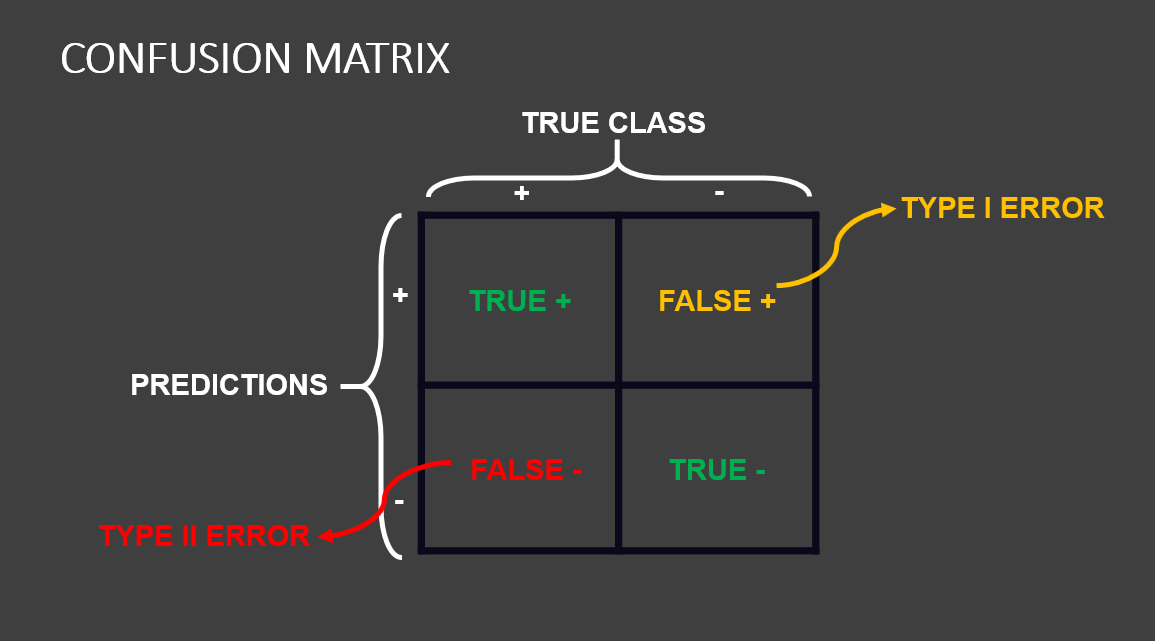

In [281]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 4ms/step - loss: 0.6097 - accuracy: 0.9162
Test Accuracy: 0.9162312150001526


In [282]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [283]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

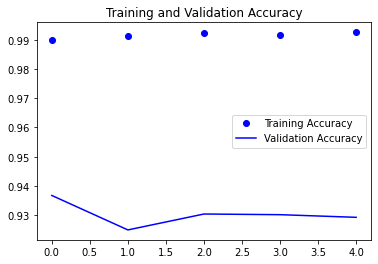

In [284]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

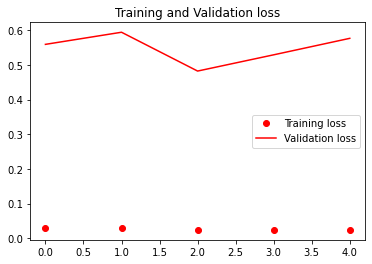

In [285]:

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [286]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

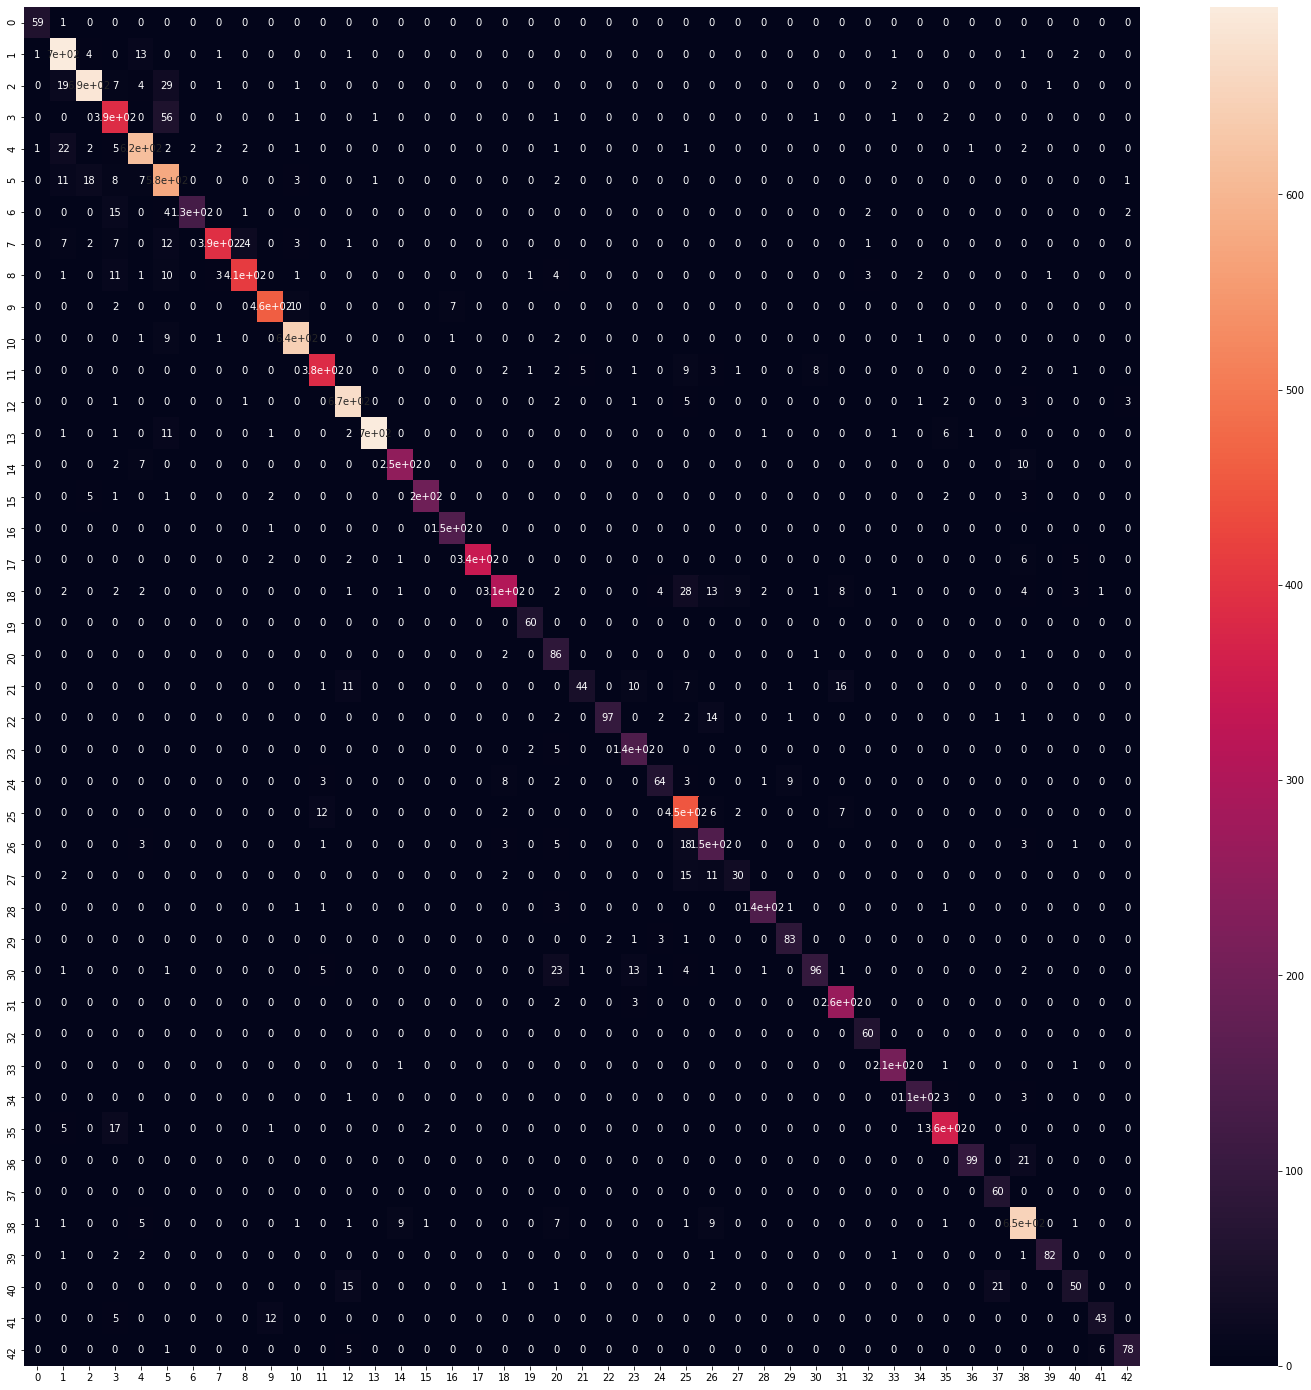

In [287]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

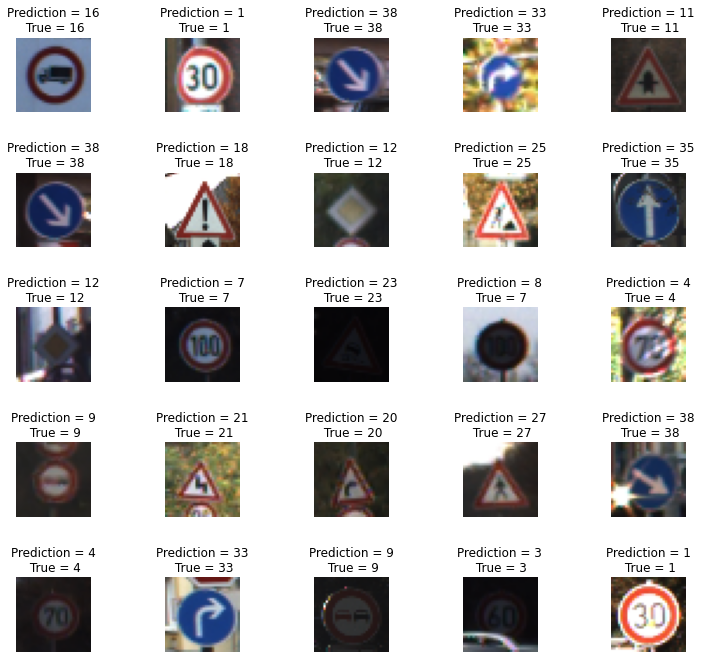

In [292]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    